In [1]:
%reset
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import warnings
warnings.filterwarnings("ignore")

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [48]:
%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Bachman_EBT_test4/

#%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_KS025_CONST1_BC/

av = xr.open_dataset('averages_00030002.nc', decode_times=False)  
MEKEds = xr.open_dataset('MEKEaverages_00031502.nc', decode_times=False)


fs = xr.open_dataset('static.nc', decode_times=False)

/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Bachman_EBT_test4


In [36]:
#Read in various grid variables from the static file:

depth = np.array(fs['depth_ocean'])
area_t=np.array(fs['area_t'])

xh = fs.xh.values
yh = fs.yh.values


MEKE_src_adv      = MEKEds['MEKE_src_adv'].mean('time')
MEKE_src_mom_K4   = MEKEds['MEKE_src_mom_K4'].mean('time')
MEKE_src_btm_drag = MEKEds['MEKE_src_btm_drag'].mean('time')
MEKE_src_GM       = MEKEds['MEKE_src_GM'].mean('time')
MEKE_src_mom_lp   = MEKEds['MEKE_src_mom_lp'].mean('time')
MEKE_src_mom_bh   = MEKEds['MEKE_src_mom_bh'].mean('time')

MEKE = MEKEds['MEKE'].mean('time')
Sum = MEKE_src_adv + MEKE_src_mom_K4 + MEKE_src_btm_drag + MEKE_src_GM + MEKE_src_mom_lp + MEKE_src_mom_bh

print(Sum.shape)

np.nanmean(MEKE_src_mom_lp)

(280, 120)


-1.1292392e-08

In [37]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

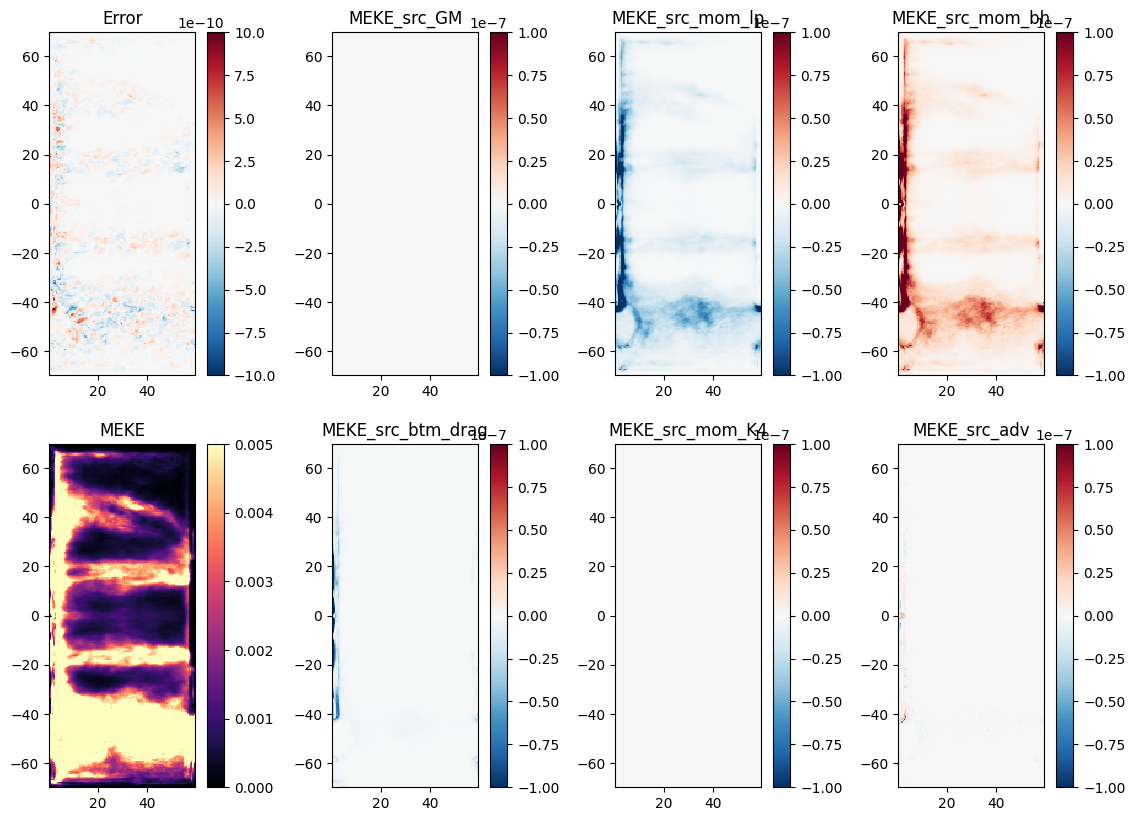

In [38]:
plt.figure(figsize=(14,10),dpi=100)


cmin=-1e-7; cmax=1e-7;


plt.subplot(2,4,1)
plt.pcolormesh(xh,yh,Sum,cmap='RdBu_r',vmin=cmin/100,vmax=cmax/100)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Error')
cbar=plt.colorbar()

plt.subplot(2,4,2)
plt.pcolormesh(xh,yh,MEKE_src_GM,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_GM')
cbar=plt.colorbar()

plt.subplot(2,4,3)
plt.pcolormesh(xh,yh,MEKE_src_mom_lp,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_mom_lp')
cbar=plt.colorbar()

plt.subplot(2,4,4)
plt.pcolormesh(xh,yh,MEKE_src_mom_bh,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_mom_bh')
cbar=plt.colorbar()


plt.subplot(2,4,5)
plt.pcolormesh(xh,yh,MEKE,cmap='magma',vmin=0,vmax=0.005)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE')
cbar=plt.colorbar()

plt.subplot(2,4,6)
plt.pcolormesh(xh,yh,MEKE_src_btm_drag,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_btm_drag')
cbar=plt.colorbar()
plt.subplot(2,4,7)

plt.pcolormesh(xh,yh,MEKE_src_mom_K4,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_mom_K4')
cbar=plt.colorbar()

plt.subplot(2,4,8)
plt.pcolormesh(xh,yh,MEKE_src_adv,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE_src_adv')
cbar=plt.colorbar()


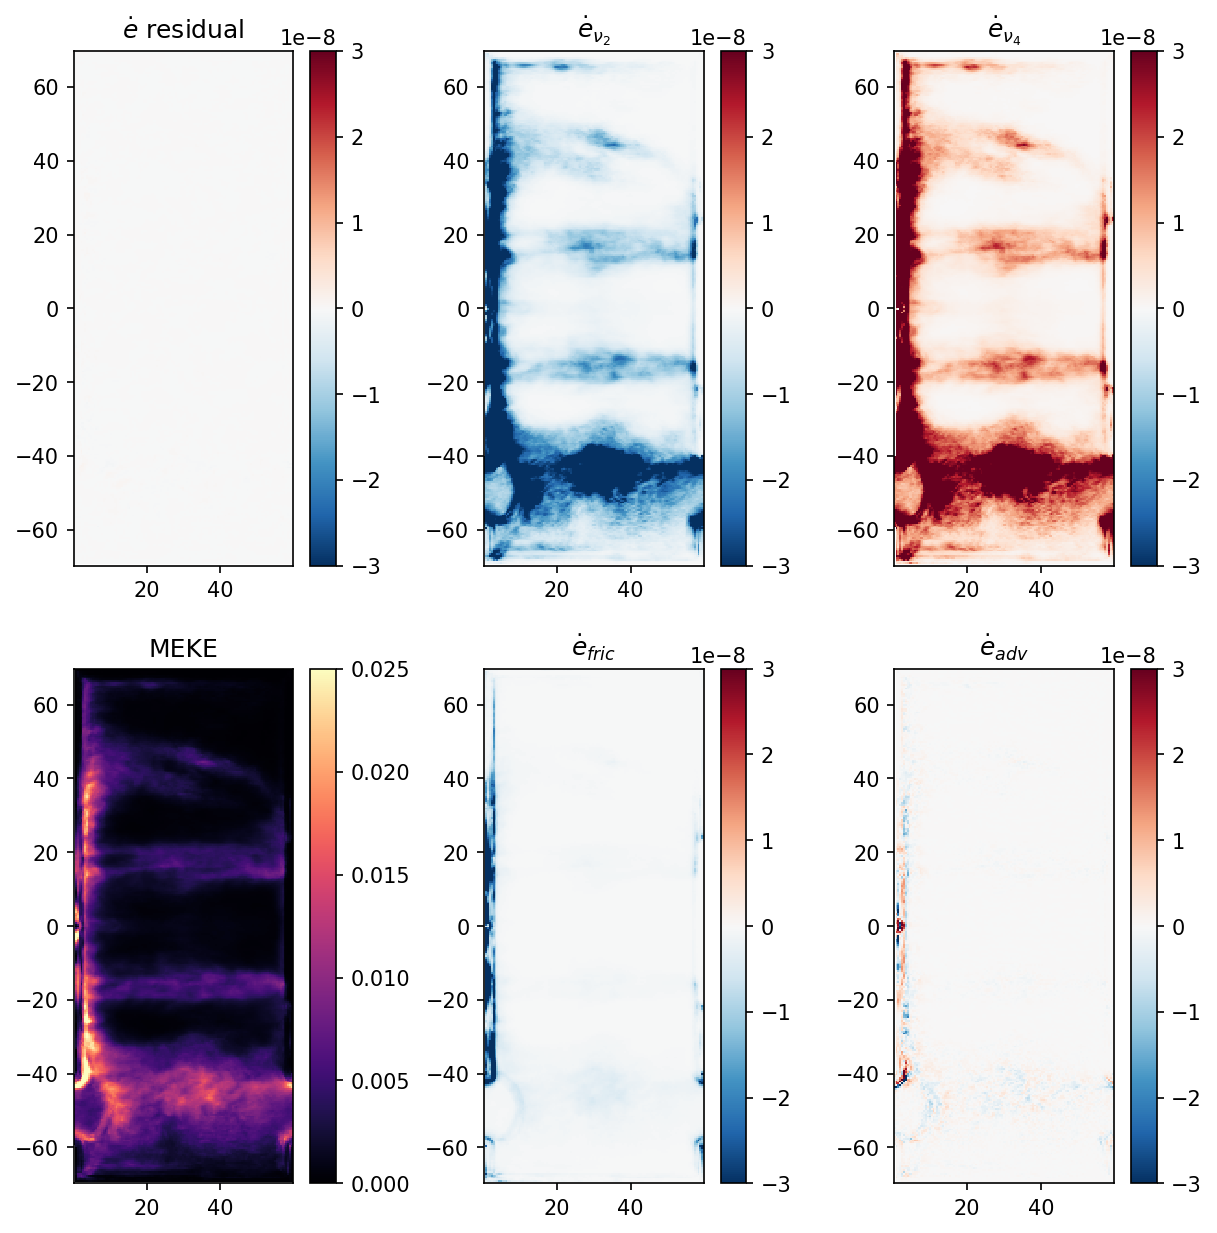

In [39]:
plt.figure(figsize=(10,10),dpi=150)


cmin=-3e-8; cmax=3e-8;


plt.subplot(2,3,1)
plt.pcolormesh(xh,yh,Sum,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e$ residual')
cbar=plt.colorbar()

# plt.subplot(2,3,2)
# plt.pcolormesh(xh,yh,MEKE_src_GM,cmap='RdBu_r',vmin=cmin,vmax=cmax)
# plt.gca().set_aspect('equal', adjustable='box')
# plt.title('MEKE_src_GM')
# cbar=plt.colorbar()

plt.subplot(2,3,2)
plt.pcolormesh(xh,yh,MEKE_src_mom_lp,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{\nu_2}$')
cbar=plt.colorbar()

plt.subplot(2,3,3)
plt.pcolormesh(xh,yh,MEKE_src_mom_bh,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{\nu_4}$')
cbar=plt.colorbar()


plt.subplot(2,3,4)
plt.pcolormesh(xh,yh,MEKE,cmap='magma',vmin=0,vmax=0.025)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('MEKE')
cbar=plt.colorbar()

plt.subplot(2,3,5)
plt.pcolormesh(xh,yh,MEKE_src_btm_drag,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{fric}$')
cbar=plt.colorbar()

plt.subplot(2,3,6)
plt.pcolormesh(xh,yh,MEKE_src_adv,cmap='RdBu_r',vmin=cmin,vmax=cmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'$\.e_{adv}$')
cbar=plt.colorbar()

In [40]:
MEKE = MEKEds.MEKE.mean('time')
MEKE_KU = MEKEds.MEKE_KU.mean('time')
MEKE_Ub = MEKEds.MEKE_Ub.mean('time')

In [41]:
MEKE_Ub.shape

(280, 120)

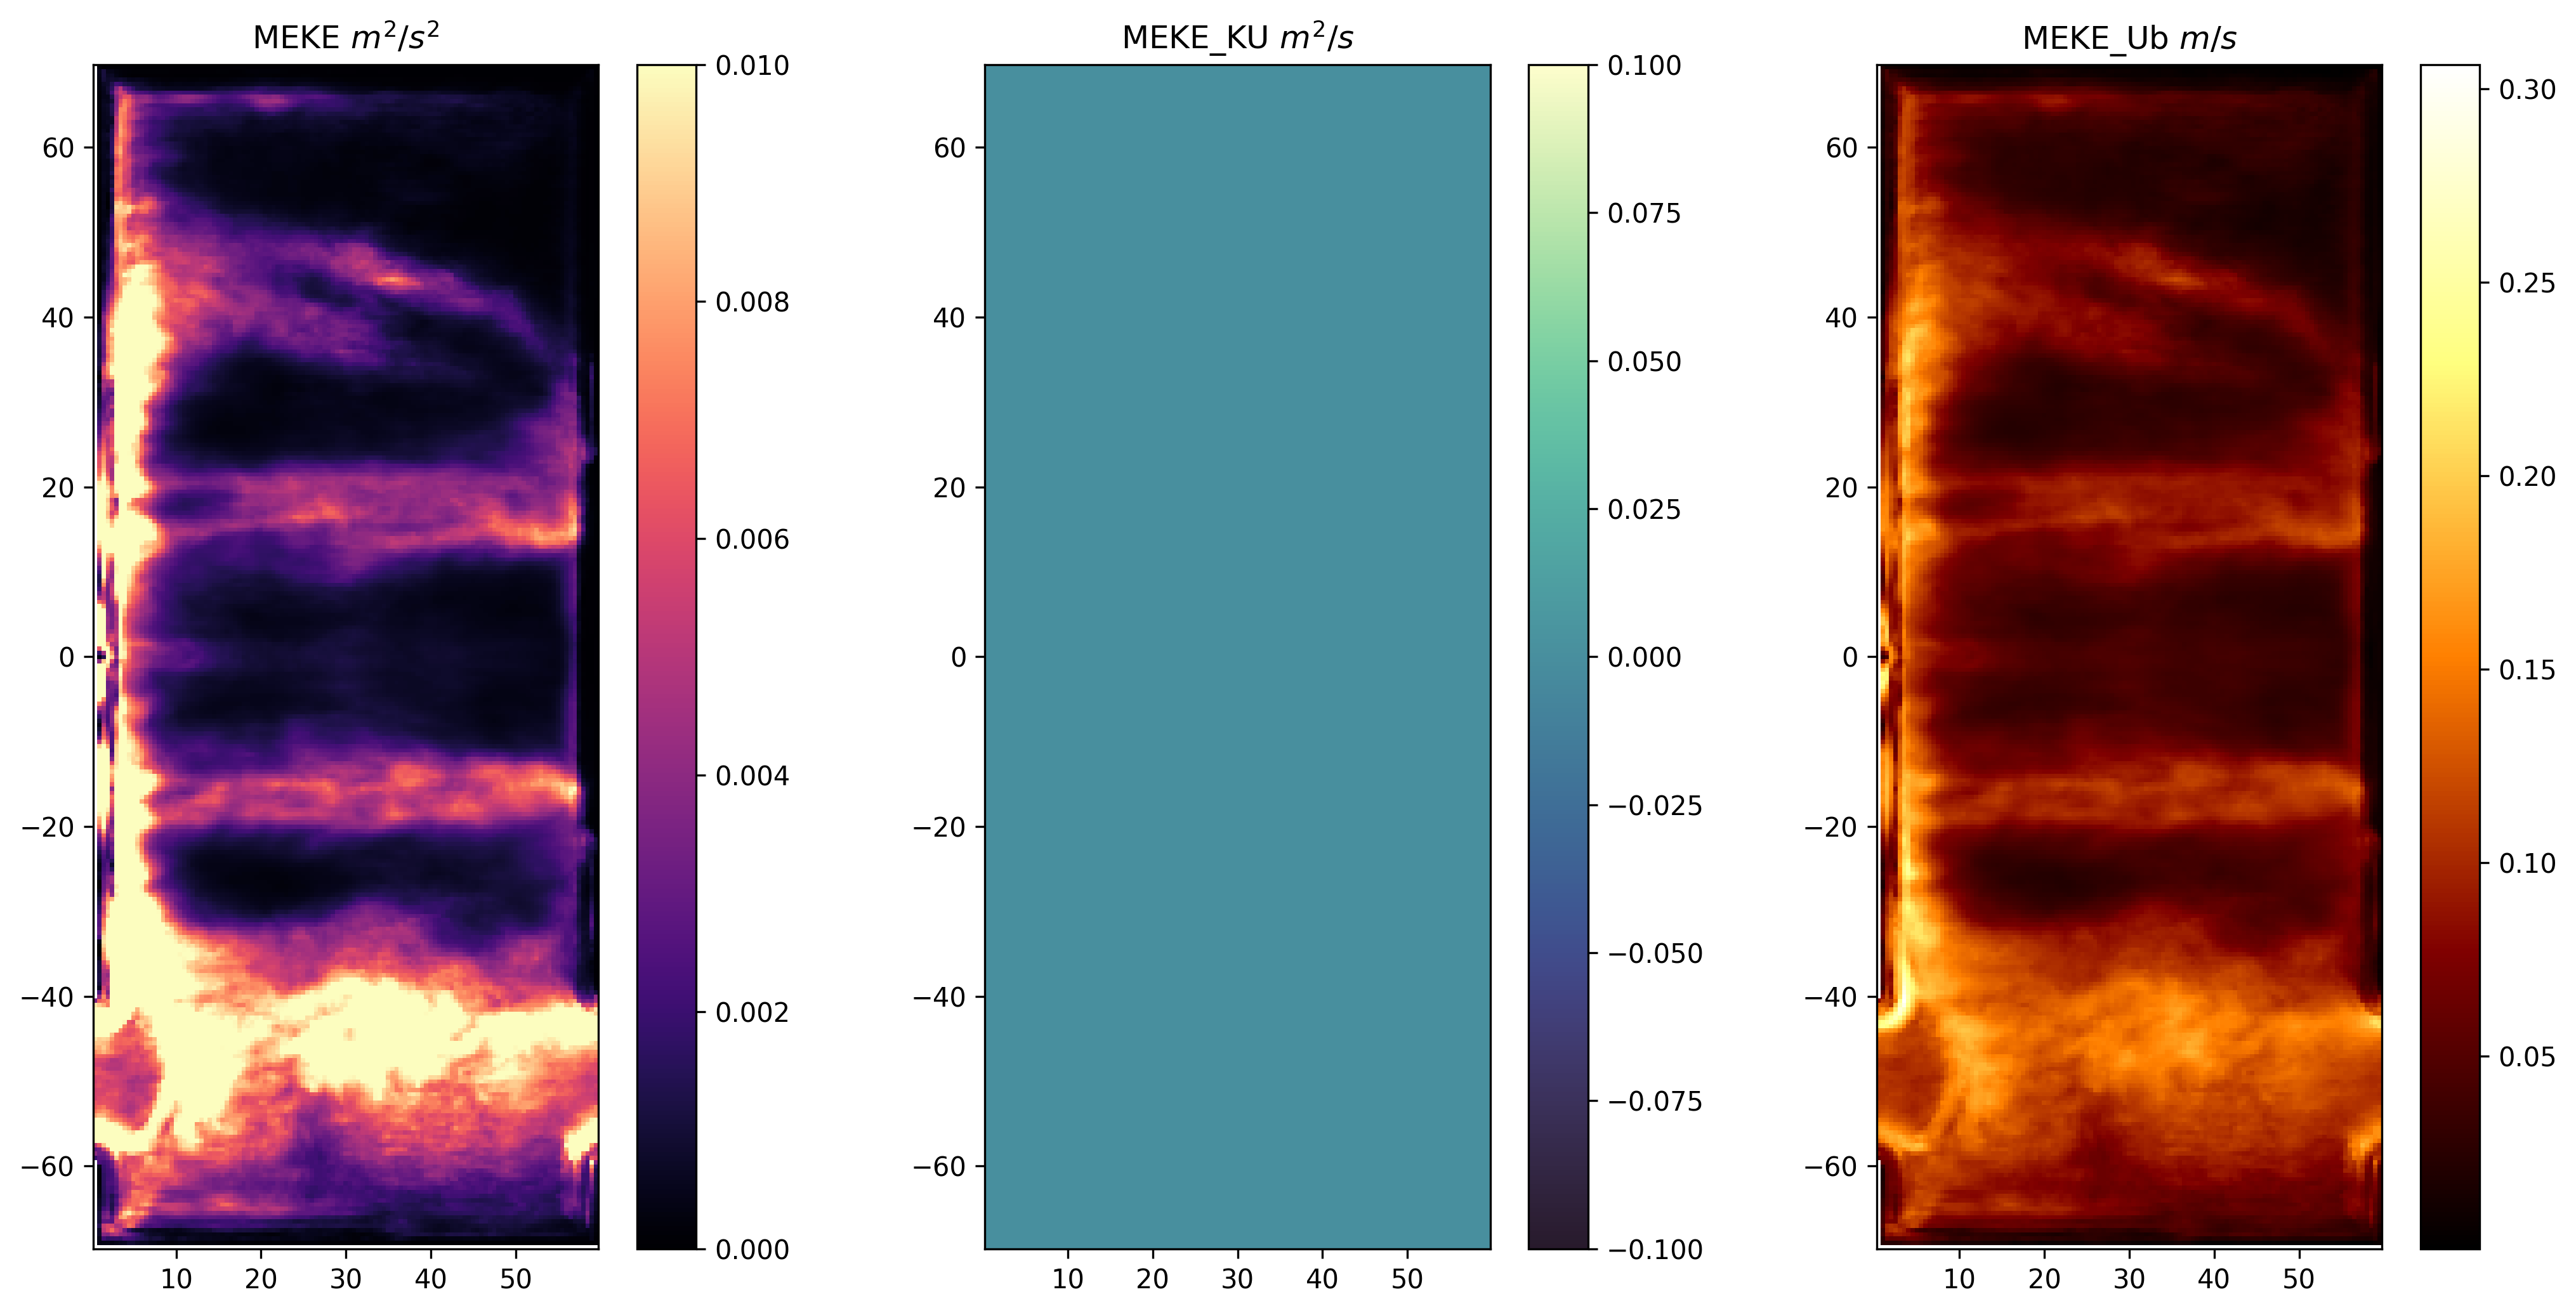

In [42]:
plt.figure(figsize=(14,7),dpi=300)


cmin=-1e-4; cmax=1e-4;
plt.subplot(1,3,1)
plt.pcolormesh(xh,yh,MEKE,cmap='magma',vmin=0.,vmax=.01)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'MEKE $m^2/s^2$')
plt.colorbar()


plt.subplot(1,3,2)
plt.pcolormesh(xh,yh,MEKE_KU,cmap=cmocean.cm.deep_r)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'MEKE_KU $m^2/s$')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(xh,yh,MEKE_Ub,cmap='afmhot')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'MEKE_Ub $m/s$')
plt.colorbar()

plt.tight_layout()


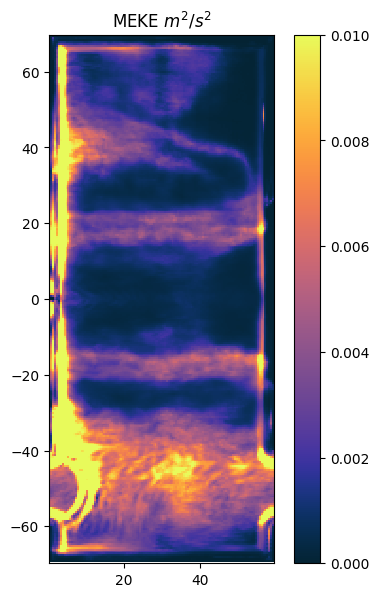

In [30]:
plt.figure(figsize=(5,7),dpi=100)


cmin=-1e-4; cmax=1e-4;

plt.pcolormesh(xh,yh,MEKE,cmap=cmocean.cm.thermal,vmin=0.,vmax=.01)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'MEKE $m^2/s^2$')
plt.colorbar()
